In [56]:
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from urlextract import URLExtract
import pandas as pd
import seaborn as sns
from collections import Counter
extract = URLExtract()
import emoji

In [57]:

# Function to convert time format to 24-hour format
def convert_to_24_hours(time_str):
    # Replace the narrow no-break space with a regular space
    time_str = time_str.replace('\u202f', ' ')
    # Parse the time string to a datetime object
    time_obj = pd.to_datetime(time_str, format='%d/%m/%y, %I:%M %p')
    # Convert the datetime object to a string in 24-hour format
    time_24_hours = time_obj.strftime('%d/%m/%y, %H:%M')
    return time_24_hours

# Read the WhatsApp chat data from the text file
with open('grp chat_modified.txt', 'r', encoding='utf-8') as file:
    chat_data = file.readlines()

# Process each line and convert the time format
modified_lines = []
for line in chat_data:
    # Extract the time from each line using a regular expression
    match = re.search(r'\d{2}/\d{2}/\d{2}, \d{1,2}:\d{2} [ap]m', line)
    if match:
        time_str = match.group()
        time_24_hours = convert_to_24_hours(time_str)
        line = line.replace(time_str, time_24_hours)

    # Append the modified line to the list
    modified_lines.append(line.strip())

# Write the modified chat data back to the file
with open('grp chat_modified.txt', 'w', encoding='utf-8') as file:
    file.write('\n'.join(modified_lines))

# Read the modified chat data from the file
with open('grp chat_modified.txt', 'r', encoding='utf-8') as file:
    chat_data = file.readlines()

# Extract dates and messages
pattern = r'(\d{2}/\d{2}/\d{2}, \d{2}:\d{2}) - (.*)'
chat_tuples = [re.match(pattern, line).groups() for line in chat_data if re.match(pattern, line)]

# Create DataFrame
df = pd.DataFrame(chat_tuples, columns=['message_date', 'user_message'])

# Convert the message_date column to datetime format
df['message_date'] = pd.to_datetime(df['message_date'], format='%d/%m/%y, %H:%M')

# Rename the message_date column to date
df.rename(columns={'message_date': 'date'}, inplace=True)

# Display the DataFrame
df=pd.DataFrame(df)
df

,date,user_message
0,2023-06-03 10:53:00,Messages and calls are end-to-end encrypted. N...
1,2023-06-03 10:53:00,"Jalla Srikanth created group ""Aadhya"""
2,2023-06-03 10:53:00,Jalla Srikanth: <Media omitted>
3,2023-06-03 10:53:00,Jalla Srikanth added you
4,2023-06-03 10:54:00,Jalla Srikanth: Mana vit students ni kuda add ...
...,...,...
13747,2024-03-03 15:47:00,Lenze: <Media omitted>
13748,2024-03-03 15:50:00,Lenze: <Media omitted>
13749,2024-03-03 16:31:00,Jalla Srikanth: <Media omitted>
13750,2024-03-03 16:31:00,Jalla Srikanth: <Media omitted>


In [58]:
df.shape

(13752, 2)

In [59]:
users = []
messages = []
for message in df['user_message']:
    entry = re.split('([\w\W]+?):\s', message)
    if entry[1:]:  # user name
        users.append(entry[1])
        messages.append(" ".join(entry[2:]))
    else:
        users.append('group_notification')
        messages.append(entry[0])

df['user'] = users
df['message'] = messages
# df.drop(columns=['user_message'], inplace=True)
df['only_date'] = df['date'].dt.date
df['year'] = df['date'].dt.year
df['month_num'] = df['date'].dt.month
df['month'] = df['date'].dt.month_name()
df['day'] = df['date'].dt.day
df['day_name'] = df['date'].dt.day_name()
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute
period = []
for hour in df[['day_name', 'hour']]['hour']:
    if hour == 23:
        period.append(str(hour) + "-" + str('00'))
    elif hour == 0:
        period.append(str('00') + "-" + str(hour + 1))
    else:
        period.append(str(hour) + "-" + str(hour + 1))

df['period'] = period

In [60]:
df

,date,user_message,user,message,only_date,year,month_num,month,day,day_name,hour,minute,period
0,2023-06-03 10:53:00,Messages and calls are end-to-end encrypted. N...,group_notification,Messages and calls are end-to-end encrypted. N...,2023-06-03,2023,6,June,3,Saturday,10,53,10-11
1,2023-06-03 10:53:00,"Jalla Srikanth created group ""Aadhya""",group_notification,"Jalla Srikanth created group ""Aadhya""",2023-06-03,2023,6,June,3,Saturday,10,53,10-11
2,2023-06-03 10:53:00,Jalla Srikanth: <Media omitted>,Jalla Srikanth,<Media omitted>,2023-06-03,2023,6,June,3,Saturday,10,53,10-11
3,2023-06-03 10:53:00,Jalla Srikanth added you,group_notification,Jalla Srikanth added you,2023-06-03,2023,6,June,3,Saturday,10,53,10-11
4,2023-06-03 10:54:00,Jalla Srikanth: Mana vit students ni kuda add ...,Jalla Srikanth,Mana vit students ni kuda add cheskunna🥲,2023-06-03,2023,6,June,3,Saturday,10,54,10-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13747,2024-03-03 15:47:00,Lenze: <Media omitted>,Lenze,<Media omitted>,2024-03-03,2024,3,March,3,Sunday,15,47,15-16
13748,2024-03-03 15:50:00,Lenze: <Media omitted>,Lenze,<Media omitted>,2024-03-03,2024,3,March,3,Sunday,15,50,15-16
13749,2024-03-03 16:31:00,Jalla Srikanth: <Media omitted>,Jalla Srikanth,<Media omitted>,2024-03-03,2024,3,March,3,Sunday,16,31,16-17
13750,2024-03-03 16:31:00,Jalla Srikanth: <Media omitted>,Jalla Srikanth,<Media omitted>,2024-03-03,2024,3,March,3,Sunday,16,31,16-17


In [61]:
period = []
for hour in df[['day_name', 'hour']]['hour']:
    if hour == 23:
        period.append(str(hour) + "-" + str('00'))
    elif hour == 0:
        period.append(str('00') + "-" + str(hour + 1))
    else:
        period.append(str(hour) + "-" + str(hour + 1))

df['period'] = period

In [62]:
df.head()

,date,user_message,user,message,only_date,year,month_num,month,day,day_name,hour,minute,period
0,2023-06-03 10:53:00,Messages and calls are end-to-end encrypted. N...,group_notification,Messages and calls are end-to-end encrypted. N...,2023-06-03,2023,6,June,3,Saturday,10,53,10-11
1,2023-06-03 10:53:00,"Jalla Srikanth created group ""Aadhya""",group_notification,"Jalla Srikanth created group ""Aadhya""",2023-06-03,2023,6,June,3,Saturday,10,53,10-11
2,2023-06-03 10:53:00,Jalla Srikanth: <Media omitted>,Jalla Srikanth,<Media omitted>,2023-06-03,2023,6,June,3,Saturday,10,53,10-11
3,2023-06-03 10:53:00,Jalla Srikanth added you,group_notification,Jalla Srikanth added you,2023-06-03,2023,6,June,3,Saturday,10,53,10-11
4,2023-06-03 10:54:00,Jalla Srikanth: Mana vit students ni kuda add ...,Jalla Srikanth,Mana vit students ni kuda add cheskunna🥲,2023-06-03,2023,6,June,3,Saturday,10,54,10-11


In [63]:
print(df.columns)

Index(['date', 'user_message', 'user', 'message', 'only_date', 'year',
       'month_num', 'month', 'day', 'day_name', 'hour', 'minute', 'period'],
      dtype='object')


In [64]:
words=[]
for message in df['message']:
    words.extend(message.split())
total_number_of_words=len(words)
total_number_of_words

49162

In [65]:
num_media_messages = df[df['message'] == '<Media omitted>'].shape[0]
num_media_messages

1439

In [66]:
links = []
for message in df['message']:
    links.extend(extract.find_urls(message))
no_of_links_shared=len(links)
no_of_links_shared

374

In [67]:
#most active user 
most_active_5 = df['user'].value_counts().head(6)
names_wise_percentage = round((df['user'].value_counts() / df.shape[0]) * 100, 2).reset_index().rename(columns={'index': 'name', 'user': 'percent'})

names_wise_percentage
most_active_5

user
Jalla Srikanth    3391
Somnath Reddy     3358
Snake(🐍)          3065
Deepu Vit Ecm     2228
Venkat Vit        1199
Lenze              492
Name: count, dtype: int64

C:\Users\somna\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128013 (\N{SNAKE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


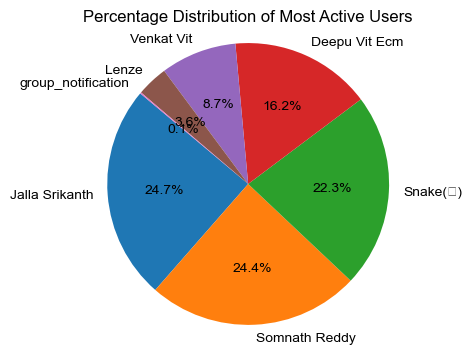

In [68]:

import matplotlib.pyplot as plt

# Filter the DataFrame to get the most active users
most_active_5 = df['user'].value_counts().head(6)

# Calculate the percentage distribution of users
names_wise_percentage = round((df['user'].value_counts() / df.shape[0]) * 100, 2).reset_index()
names_wise_percentage.columns = ['name', 'percent']

# Pie chart
plt.figure(figsize=(4, 4))
plt.pie(names_wise_percentage['percent'], labels=names_wise_percentage['name'], autopct='%1.1f%%', startangle=140)
plt.title('Percentage Distribution of Most Active Users')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [69]:
# Open and read the stop words file
with open('stop_hinglish.txt', 'r') as f:
    stop_words = f.read()

# Filter the DataFrame based on selected user
#Enter user name for word cloud
selected_user = 'Overall'  # Replace 'Somnath Reddy' with the desired user name
if selected_user != 'Overall':
    df_selected_user = df[df['user'] == selected_user]
else:
    df_selected_user = df

# Remove rows with 'group_notification' user and '<Media omitted>' message
temp = df[(df['user'] != 'group_notification') & (df['message'] != '<Media omitted>')]

# Remove stop words from messages
cleaned_messages = []
for message in temp['message']:
    cleaned_message = ' '.join([word for word in message.lower().split() if word not in stop_words and word not in "https"])
    cleaned_messages.append(cleaned_message)




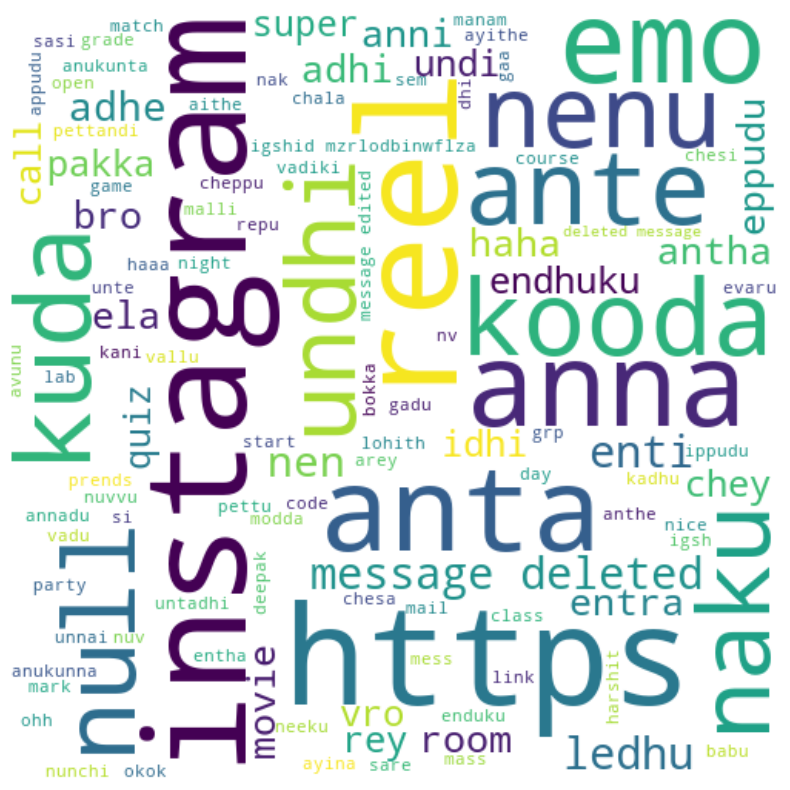

In [70]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all cleaned messages into a single string
text = ' '.join(cleaned_messages)

# Create a WordCloud object
wordcloud = WordCloud(width=500,height=500,min_font_size=10,background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [95]:

# Open and read the stop words file
with open('stop_hinglish.txt', 'r') as f:
    stop_words = f.read()

# Filter the DataFrame based on selected user
selected_user = 'Snake(🐍)'  # Replace 'Somnath Reddy' with the desired user name
if selected_user != 'Overall':
    df_selected_user = df[df['user'] == selected_user]
else:
    df_selected_user = df

# Remove rows with 'group_notification' user and '<Media omitted>' message
temp = df_selected_user[(df_selected_user['user'] != 'group_notification') & (df_selected_user['message'] != '<Media omitted>')]

# Remove stop words from messages and count the occurrences of each word
words = []
for message in temp['message']:
    words.extend([word.lower() for word in message.split() if word.lower() not in stop_words])

# Create a DataFrame with the top 20 most common words
most_common_words_df = pd.DataFrame(Counter(words).most_common(10), columns=['Word', 'Frequency'])
# Print or return the DataFrame with the most common words
most_common_words_df


,Word,Frequency
0,😂,106
1,",",74
2,🙂,73
3,anna,72
4,kuda,70
5,message,63
6,undhi,58
7,nenu,57
8,naku,54
9,deleted,52


In [96]:
selected_user='Jalla Srikanth'
if selected_user != 'Overall':
    df= df[df['user'] == selected_user]

emojis = []
for message in df['message']:
    emojis.extend([c for c in message if emoji.is_emoji(c)])

emoji_df = pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))
emoji_df

,0,1
0,🤣,424
1,😂,346
2,🥲,164
3,🙂,146
4,🌚,109
...,...,...
101,😕,1
102,🍻,1
103,🌹,1
104,🎆,1


In [74]:
selected_user='Overall'
if selected_user != 'Overall':
    df = df[df['user'] == selected_user]

timeline = df.groupby(['year', 'month_num', 'month']).count()['message'].reset_index()

time = []
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i] + "-" + str(timeline['year'][i]))
timeline['time'] = time
timeline

,year,month_num,month,message,time
0,2023,6,June,226,June-2023
1,2023,7,July,1479,July-2023
2,2023,8,August,2436,August-2023
3,2023,9,September,1465,September-2023
4,2023,10,October,1952,October-2023
5,2023,11,November,2851,November-2023
6,2023,12,December,1342,December-2023
7,2024,1,January,746,January-2024
8,2024,2,February,1219,February-2024
9,2024,3,March,36,March-2024


In [75]:
if selected_user != 'Overall':
    df = df[df['user'] == selected_user]
df['day_name'].value_counts()

day_name
Saturday     2521
Monday       2346
Thursday     1982
Friday       1947
Wednesday    1787
Sunday       1737
Tuesday      1432
Name: count, dtype: int64

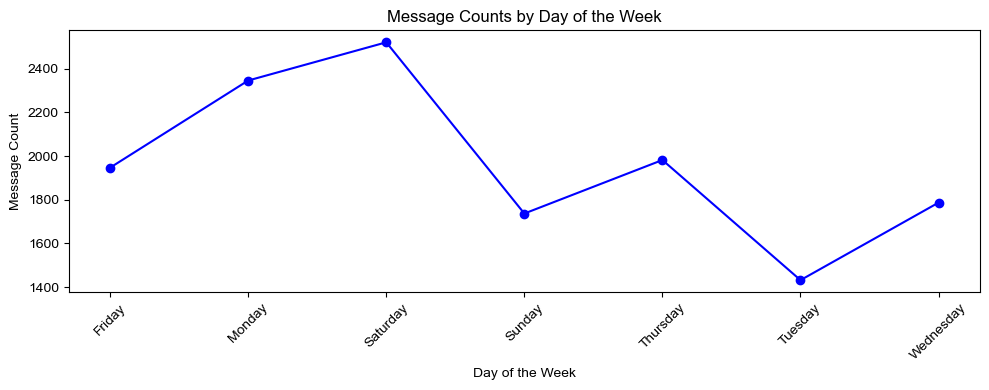

In [76]:
# Filter the DataFrame if a specific user is selected
if selected_user != 'Overall':
    df = df[df['user'] == selected_user]

# Count the number of messages for each day of the week
day_counts = df['day_name'].value_counts().sort_index()

# Plotting the line graph
plt.figure(figsize=(10, 4))
plt.plot(day_counts.index, day_counts.values, marker='o', color='blue', linestyle='-')
plt.xlabel('Day of the Week')
plt.ylabel('Message Count')
plt.title('Message Counts by Day of the Week')
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.show()


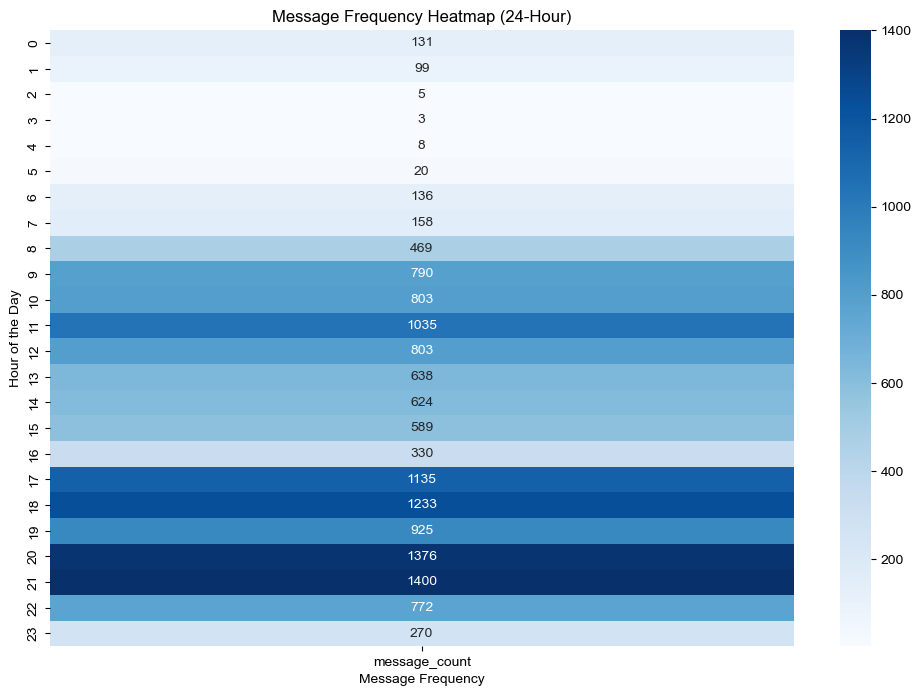

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate data by hour and count the number of messages
hourly_message_count = df.groupby('hour').size().reset_index(name='message_count')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(hourly_message_count.set_index('hour'), cmap='Blues', annot=True, fmt='d')
plt.title('Message Frequency Heatmap (24-Hour)')
plt.xlabel('Message Frequency')
plt.ylabel('Hour of the Day')
plt.show()


In [78]:
#monthly activity
if selected_user != 'Overall':
    df = df[df['user'] == selected_user]
df['month'].value_counts()


month
November     2851
August       2436
October      1952
July         1479
September    1465
December     1342
February     1219
January       746
June          226
March          36
Name: count, dtype: int64

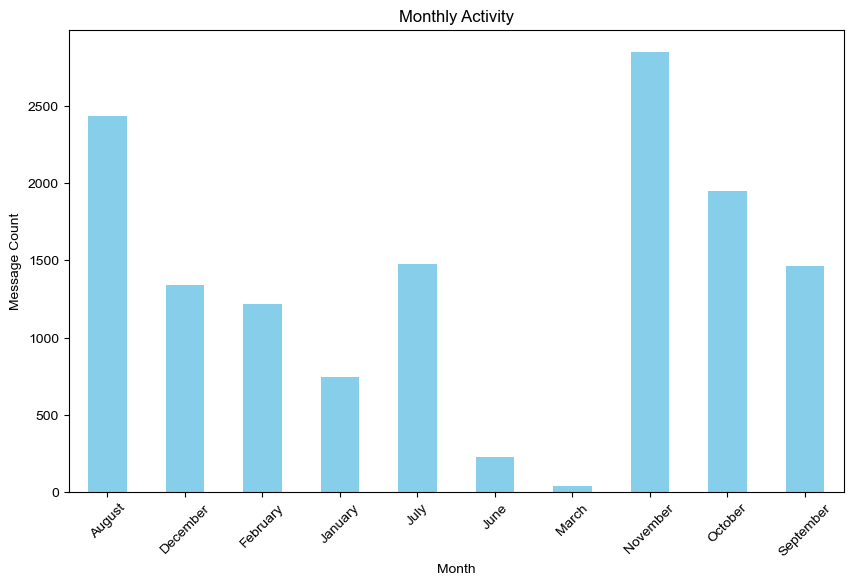

In [79]:
import matplotlib.pyplot as plt

# Aggregate data by month and count the number of messages
monthly_activity = df['month'].value_counts().sort_index()

# Plot the bar graph
plt.figure(figsize=(10, 6))
monthly_activity.plot(kind='bar', color='skyblue')
plt.title('Monthly Activity')
plt.xlabel('Month')
plt.ylabel('Message Count')
plt.xticks(rotation=45)
plt.show()


In [80]:
if selected_user != 'Overall':
    df = df[df['user'] == selected_user]

user_heatmap = df.pivot_table(index='day_name', columns='period', values='message', aggfunc='count').fillna(0)
user_heatmap

period,00-1,1-2,10-11,11-12,12-13,13-14,14-15,15-16,16-17,17-18,...,21-22,22-23,23-00,3-4,4-5,5-6,6-7,7-8,8-9,9-10
day_name,,,,,,,,,,,,,,,,,,,,,
Friday,13.0,1.0,132.0,160.0,178.0,70.0,43.0,22.0,13.0,128.0,...,185.0,104.0,10.0,2.0,0.0,0.0,22.0,23.0,91.0,117.0
Monday,20.0,2.0,78.0,104.0,131.0,105.0,210.0,190.0,48.0,482.0,...,144.0,89.0,19.0,0.0,0.0,6.0,32.0,16.0,54.0,52.0
Saturday,11.0,5.0,126.0,126.0,230.0,134.0,89.0,232.0,57.0,137.0,...,331.0,195.0,104.0,0.0,2.0,1.0,15.0,23.0,130.0,106.0
Sunday,18.0,2.0,35.0,94.0,51.0,160.0,111.0,45.0,38.0,53.0,...,189.0,97.0,21.0,0.0,3.0,1.0,6.0,18.0,58.0,145.0
Thursday,26.0,0.0,58.0,322.0,101.0,70.0,60.0,38.0,58.0,185.0,...,267.0,40.0,18.0,0.0,1.0,1.0,16.0,18.0,31.0,41.0
Tuesday,29.0,7.0,144.0,94.0,78.0,62.0,55.0,39.0,62.0,113.0,...,151.0,133.0,29.0,1.0,2.0,2.0,36.0,24.0,70.0,120.0
Wednesday,14.0,82.0,230.0,135.0,34.0,37.0,56.0,23.0,54.0,37.0,...,133.0,114.0,69.0,0.0,0.0,9.0,9.0,36.0,35.0,209.0


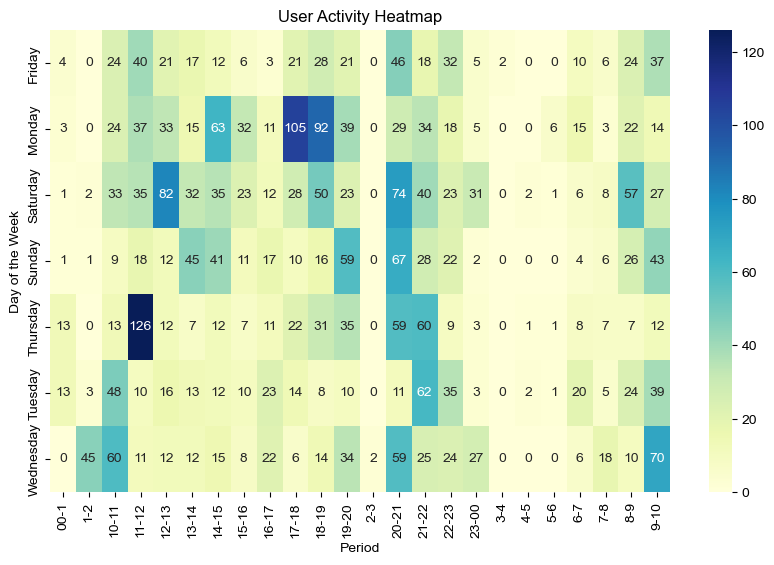

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(user_heatmap, cmap='YlGnBu', annot=True, fmt='g')
plt.title('User Activity Heatmap')
plt.xlabel('Period')
plt.ylabel('Day of the Week')
plt.show()
